In [20]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Traning Data

In [2]:
train_labels = []
train_samples = []


    
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_order = randint(65,100)
    train_samples.append(random_order)
    train_labels.append(0)
    
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_order = randint(65,100)
    train_samples.append(random_order)
    train_labels.append(1)

    
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0,1))

scaler_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/sakib/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
scaler_train_samples

array([[0.33333333],
       [0.72413793],
       [0.04597701],
       ...,
       [0.98850575],
       [0.36781609],
       [1.        ]])

# Test Data

In [28]:
test_labels = []
test_samples = []


    
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_order = randint(65,100)
    test_samples.append(random_order)
    test_labels.append(0)
    
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_order = randint(65,100)
    test_samples.append(random_order)
    test_labels.append(1)

    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

scaler = MinMaxScaler(feature_range=(0,1))

scaler_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/sakib/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
scaler_test_samples

array([[0.06896552],
       [0.65517241],
       [0.37931034],
       [0.68965517],
       [0.55172414],
       [0.77011494],
       [0.35632184],
       [0.89655172],
       [0.34482759],
       [0.91954023],
       [0.49425287],
       [0.95402299],
       [0.37931034],
       [0.71264368],
       [0.13793103],
       [0.65517241],
       [0.52873563],
       [0.93103448],
       [0.13793103],
       [0.6091954 ],
       [0.26436782],
       [0.8045977 ],
       [0.24137931],
       [0.74712644],
       [0.50574713],
       [0.6091954 ],
       [0.24137931],
       [0.71264368],
       [0.45977011],
       [0.72413793],
       [0.35632184],
       [0.83908046],
       [0.2183908 ],
       [1.        ],
       [0.32183908],
       [0.66666667],
       [0.18390805],
       [0.95402299],
       [0.05747126],
       [0.59770115],
       [0.04597701],
       [0.74712644],
       [0.28735632],
       [0.64367816],
       [0.57471264],
       [0.65517241],
       [0.44827586],
       [0.620

# Model Build

In [6]:
model = Sequential([
    Dense(16,input_shape=(1,),activation="relu"),
    Dense(32,activation="relu"),
    Dense(2,activation="softmax")
    
])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [9]:
#valid_set = [(sample,lable),(sample,lable),-,(sample,lable)]

In [10]:
model.fit(scaler_train_samples,train_labels,validation_split=0.1,batch_size=10,
          epochs=20,shuffle=True,verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.7060 - acc: 0.4079 - val_loss: 0.6967 - val_acc: 0.2429
Epoch 2/20
 - 0s - loss: 0.6860 - acc: 0.5709 - val_loss: 0.6739 - val_acc: 0.7286
Epoch 3/20
 - 0s - loss: 0.6676 - acc: 0.7053 - val_loss: 0.6555 - val_acc: 0.7476
Epoch 4/20
 - 0s - loss: 0.6485 - acc: 0.7106 - val_loss: 0.6291 - val_acc: 0.7476
Epoch 5/20
 - 0s - loss: 0.6207 - acc: 0.7529 - val_loss: 0.5951 - val_acc: 0.8238
Epoch 6/20
 - 0s - loss: 0.5925 - acc: 0.7958 - val_loss: 0.5650 - val_acc: 0.8286
Epoch 7/20
 - 0s - loss: 0.5663 - acc: 0.8079 - val_loss: 0.5349 - val_acc: 0.8381
Epoch 8/20
 - 0s - loss: 0.5401 - acc: 0.8243 - val_loss: 0.5047 - val_acc: 0.8619
Epoch 9/20
 - 0s - loss: 0.5143 - acc: 0.8444 - val_loss: 0.4752 - val_acc: 0.8667
Epoch 10/20
 - 0s - loss: 0.4894 - acc: 0.8466 - val_loss: 0.4463 - val_acc: 0.9048
Epoch 11/20
 - 0s - loss: 0.4651 - acc: 0.8640 - val_loss: 0.4178 - val_acc: 0.9048
Epoch 12/20
 - 0s - loss: 0.4421 - acc

In [11]:
#model.fit(scaler_train_samples,train_labels,batch_size=10,epochs=20,shuffle=True,verbose=2)

# Predict

In [30]:
predictions = model.predict(scaler_test_samples,batch_size=10,verbose=0)

In [31]:
for i in predictions:
    print(i)

[0.90870523 0.09129471]
[0.3188921 0.6811079]
[0.7505855  0.24941446]
[0.27062705 0.72937304]
[0.48471954 0.5152804 ]
[0.17739168 0.82260835]
[0.77847266 0.22152735]
[0.09023528 0.90976465]
[0.79155314 0.2084468 ]
[0.08341652 0.9165835 ]
[0.58090395 0.41909605]
[0.07416786 0.92583215]
[0.7505855  0.24941446]
[0.24113002 0.75887   ]
[0.9099708  0.09002917]
[0.3188921 0.6811079]
[0.52346015 0.47653985]
[0.08018561 0.9198144 ]
[0.9099708  0.09002919]
[0.38965392 0.6103461 ]
[0.8672649  0.13273504]
[0.14595371 0.8540462 ]
[0.88356644 0.11643359]
[0.20115842 0.79884154]
[0.56192046 0.4380795 ]
[0.38965392 0.6103461 ]
[0.88356644 0.11643359]
[0.24113002 0.75887   ]
[0.63623524 0.3637648 ]
[0.22722998 0.77277005]
[0.77847266 0.22152735]
[0.11927943 0.88072056]
[0.8968046  0.10319534]
[0.06354123 0.9364587 ]
[0.8159827 0.1840173]
[0.30229497 0.69770503]
[0.90574324 0.09425679]
[0.07416786 0.92583215]
[0.90849286 0.09150717]
[0.408241   0.59175897]
[0.9082799  0.09172011]
[0.20115842 0.79884154

In [32]:
rounded_predections = model.predict_classes(scaler_test_samples,batch_size=10,verbose=0)

In [33]:
for i in rounded_predections:
    print(i)

0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Confussion Matrix

In [16]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(test_labels,rounded_predections)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[191  19]
 [  9 201]]


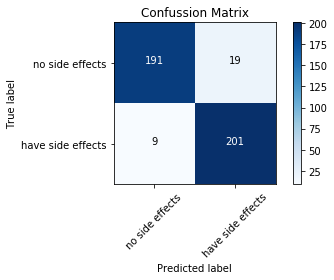

In [36]:
cm_plot_labels = ['no side effects', 'have side effects']
plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')

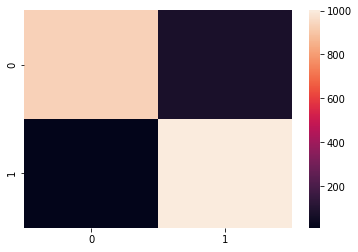

In [21]:
sns.heatmap(confusion_matrix(test_labels,rounded_predections))

In [35]:
cm

array([[191,  19],
       [  9, 201]])

In [24]:
rounded_predections[0]

0

In [38]:
test_labels[0]

1

In [37]:
len(test_labels)

420